Upload data 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


Library Loading

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

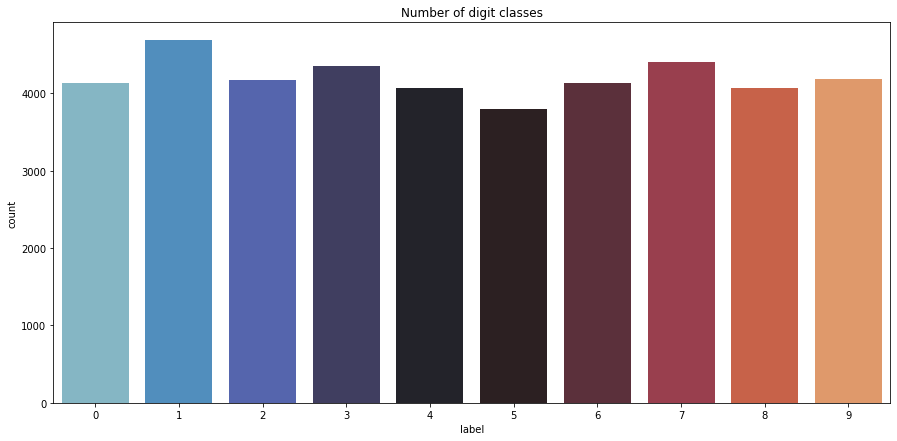

In [8]:
y_train = df['label']
X_train = df.drop(labels=['label'], axis=1)

plt.figure(figsize=(15, 7))
graph = sns.countplot(y_train, palette='icefire')
plt.title('Number of digit classes')
y_train.value_counts()

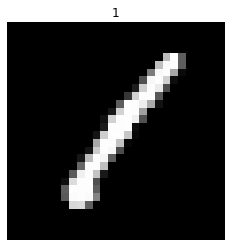

In [12]:
image = X_train.iloc[0].to_numpy()
image = image.reshape((28, 28))

plt.imshow(image, cmap='gray')
plt.title(df.iloc[0, 0])
plt.axis('off')
plt.show()

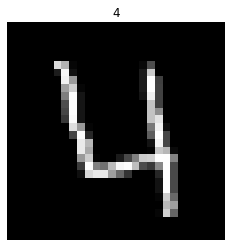

In [13]:
image = X_train.iloc[3].to_numpy()
image = image.reshape((28, 28))

plt.imshow(image, cmap='gray')
plt.title(df.iloc[3, 0])
plt.axis('off')
plt.show()

Normalize data

In [14]:
X_train = X_train / 255.0
print(f'X_train shape: {X_train.shape}')

X_train shape: (42000, 784)


Reshape data

In [16]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
print(f'X_train shape: {X_train.shape}')

X_train shape: (42000, 28, 28, 1)


Label Encoding data

In [18]:
y_train = to_categorical(y_train, num_classes=10)

Split data to train and test dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (37800, 28, 28, 1)
X_test shape: (4200, 28, 28, 1)
y_train shape: (37800, 10)
y_test shape: (4200, 10)


### Convolutional Neural Network (CNN)

CNN Model 

In [27]:
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Epochs and Batch Size

In [28]:
EPOCHS = 10
BATCH_SIZE = 250

Data Augmentation

In [29]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=5,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=False, 
        vertical_flip=False
)  

datagen.fit(X_train)

Fit the model

In [30]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE), epochs=EPOCHS, validation_data=(X_test, y_test), steps_per_epoch=X_train.shape[0] // BATCH_SIZE)

Epoch 1/10
151/151 [==============================] - 47s 193ms/step - loss: 1.5385 - accuracy: 0.4726 - val_loss: 0.1995 - val_accuracy: 0.9502
Epoch 2/10
151/151 [==============================] - 27s 178ms/step - loss: 0.4744 - accuracy: 0.8490 - val_loss: 0.1214 - val_accuracy: 0.9638
Epoch 3/10
151/151 [==============================] - 27s 178ms/step - loss: 0.3258 - accuracy: 0.8980 - val_loss: 0.0967 - val_accuracy: 0.9681
Epoch 4/10
151/151 [==============================] - 27s 178ms/step - loss: 0.2605 - accuracy: 0.9206 - val_loss: 0.0834 - val_accuracy: 0.9736
Epoch 5/10
151/151 [==============================] - 27s 180ms/step - loss: 0.2289 - accuracy: 0.9290 - val_loss: 0.0715 - val_accuracy: 0.9771
Epoch 6/10
151/151 [==============================] - 27s 179ms/step - loss: 0.2092 - accuracy: 0.9350 - val_loss: 0.0661 - val_accuracy: 0.9793
Epoch 7/10
151/151 [==============================] - 27s 179ms/step - loss: 0.1873 - accuracy: 0.9419 - val_loss: 0.0608 - val_ac

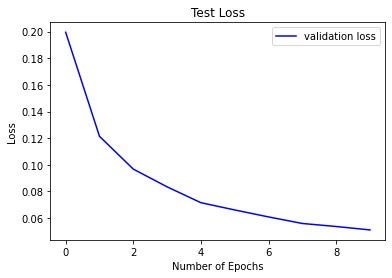

In [31]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()